In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import pywt

2

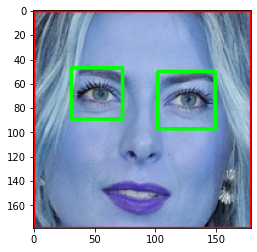

In [74]:
img=cv2.imread('./test_images/Maria_Sharapova1.jpg')
plt.imshow(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #image in gray has been created
plt.imshow(gray,cmap='gray')

face_cascade = cv2.CascadeClassifier("./cascades/haarcascade_frontalface_default.xml") 
eye_cascade = cv2.CascadeClassifier("./cascades/haarcascade_eye.xml")





faces = face_cascade.detectMultiScale(gray,1.3,5) #will wrtten array([x,y,w,h],int32)
eyes = eye_cascade.detectMultiScale(gray,1.3,5)
faces,eyes


x,y,w,h=faces[0]

#croppin the image
crpd_image=img[y:y+h,x:x+w]

cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(crpd_image,cmap='gray')


In [9]:
face_cascade = cv2.CascadeClassifier("./cascades/haarcascade_frontalface_default.xml") 
eye_cascade = cv2.CascadeClassifier("./cascades/haarcascade_eye.xml")
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
#testing with correct image
#img=get_cropped_image_if_2_eyes('./test_images/Maria_Sharapova1.jpg')
#plt.imshow(img)

#testing with fault image
a=get_cropped_image_if_2_eyes('./test_images/MariaSharapova2.webp')
print(a)


None


In [95]:
#creating cropped photo directory
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

import os
img_dirs = []  #list of all celebs
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


img_dirs

['./datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

In [96]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [105]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            #if not os.path.exists(cropped_folder):
                #os.makedirs(cropped_folder)
                #cropped_image_dirs.append(cropped_folder)
                #print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            #cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    
        
        
        

lionel_messi
./datasets/lionel_messi\A Genius in Full Bloom_ Lionel Messi....jpg
./datasets/lionel_messi\Barcelona Captain Lionel Messi Has....jpg
./datasets/lionel_messi\Barcelona face Bayern Munich again....jpg
./datasets/lionel_messi\Barcelona find a perfect Lionel Messi....jpeg
./datasets/lionel_messi\Barcelona President explains why Lionel....webp
./datasets/lionel_messi\Barcelona wants to keep Lionel Messi....jpg
./datasets/lionel_messi\Champions League glory with new club PSG.jpg
./datasets/lionel_messi\Comparing Lionel Messi and Pele_s....jpg
./datasets/lionel_messi\Estadio Leo Messi_ Fan Pays Heartfelt....jpeg
./datasets/lionel_messi\FFP flexibility needed says Barca chief....jpg
./datasets/lionel_messi\Five things on Lionel Messi.jpg
./datasets/lionel_messi\future of Lionel Messi....jpg
./datasets/lionel_messi\hat-trick as Argentina rout Bolivia....jpg
./datasets/lionel_messi\his Paris Saint Germain debut against Reims.jpg
./datasets/lionel_messi\Keylor Navas on Lionel Messi_

./datasets/maria_sharapova\Maria Sharapova Retires From Tennis....jpg
./datasets/maria_sharapova\Maria Sharapova Retires_ Her Best....jpg
./datasets/maria_sharapova\Maria Sharapova returns to action in....jpg
./datasets/maria_sharapova\Maria Sharapova Sad While Revealing....jpeg
./datasets/maria_sharapova\Maria Sharapova shares the success....jpg
./datasets/maria_sharapova\Maria Sharapova Signs on as the New....jpg
./datasets/maria_sharapova\Maria Sharapova to be reinstated as UN....jpg
./datasets/maria_sharapova\Maria Sharapova to return from five....jpg
./datasets/maria_sharapova\Maria Sharapova US Open 2015 - Maria....jpg
./datasets/maria_sharapova\Maria Sharapova Wants to Be Clear_ She....jpg
./datasets/maria_sharapova\Maria Sharapova will go down as one of....jpg
./datasets/maria_sharapova\Maria Sharapova _ Biography_ Grand Slam... (1).jpg
./datasets/maria_sharapova\Maria Sharapova _ Biography_ Grand Slam....jpg
./datasets/maria_sharapova\Maria Sharapova _ Player Stats & More....j

./datasets/roger_federer\Tennis ace Roger Federer says return....webp
./datasets/roger_federer\Tennis_ Roger Federer withdraws from... (1).jpg
./datasets/roger_federer\Tennis_ Roger Federer withdraws from....jpg
./datasets/roger_federer\The General Joy of Roger Federer....jpg
./datasets/roger_federer\Tokyo Olympics after Wimbledon _ Tennis....jpg
./datasets/roger_federer\Tokyo Olympics _ Roger Federer....jpg
./datasets/roger_federer\US Open 2021_ Roger Federer Says Return....webp
./datasets/roger_federer\Why did Roger Federer retire from the....jpg
./datasets/roger_federer\Wimbledon 2021_ Federer declares he is....jpg
./datasets/roger_federer\Wimbledon draw_ Tough path ahead for....jpg
./datasets/roger_federer\Wimbledon_ Roger Federer Crashes Out....webp
serena_williams
./datasets/serena_williams\2014 Serena Williams tennis season....jpg
./datasets/serena_williams\At the French Open_ Serena Williams Is....jpg
./datasets/serena_williams\Australian Open_ Serena Williams....jpg
./datasets

./datasets/virat_kohli\Reports_ ECB turned down Virat Kohli_s....jpg
./datasets/virat_kohli\says Virat Kohli after COVID outbreak....jpg
./datasets/virat_kohli\Sharing Platform MX Taka Tak.jpg
./datasets/virat_kohli\Sports News_The Indian Express.jpg
./datasets/virat_kohli\The Board of Control for Cricket in India.png
./datasets/virat_kohli\Time_-Virat Kohli Reacts to Shreyas....webp
./datasets/virat_kohli\Twitterati react as Virat Kohli....jpg
./datasets/virat_kohli\Virat Kohli (1).jpg
./datasets/virat_kohli\Virat Kohli - IMDb.jpg
./datasets/virat_kohli\Virat Kohli - Wikipedia.jpg
./datasets/virat_kohli\Virat Kohli backs _IndiaTogether....webp
./datasets/virat_kohli\Virat Kohli Can Win An ICC Trophy_ WV Raman.jpg
./datasets/virat_kohli\Virat Kohli completes 10 years in Test....jpeg
./datasets/virat_kohli\Virat Kohli e-mailed the BCCI at....webp
./datasets/virat_kohli\Virat Kohli Fans Trend _IStandWithVirat....jpg
./datasets/virat_kohli\Virat Kohli handing Rohit Sharma India....jpg
./d

In [10]:
import os
celebrity_file_names_dict = {}

folder="./datasets/cropped"
j=-1

for i in os.walk(folder):
    if j==-1:
        lst=i[1]
        j+=1
    else:
        path_to_img=[]
        for l in i[2]:
            path_to_img.append(folder+"/"+lst[j] + "/"+l)
        celebrity_file_names_dict[lst[j]] = path_to_img
        j+=1
celebrity_file_names_dict
        


{'lionel_messi': ['./datasets/cropped/lionel_messi/lionel_messi1.png',
  './datasets/cropped/lionel_messi/lionel_messi10.png',
  './datasets/cropped/lionel_messi/lionel_messi11.png',
  './datasets/cropped/lionel_messi/lionel_messi12.png',
  './datasets/cropped/lionel_messi/lionel_messi13.png',
  './datasets/cropped/lionel_messi/lionel_messi15.png',
  './datasets/cropped/lionel_messi/lionel_messi16.png',
  './datasets/cropped/lionel_messi/lionel_messi17.png',
  './datasets/cropped/lionel_messi/lionel_messi18.png',
  './datasets/cropped/lionel_messi/lionel_messi19.png',
  './datasets/cropped/lionel_messi/lionel_messi2.png',
  './datasets/cropped/lionel_messi/lionel_messi20.png',
  './datasets/cropped/lionel_messi/lionel_messi21.png',
  './datasets/cropped/lionel_messi/lionel_messi22.png',
  './datasets/cropped/lionel_messi/lionel_messi23.png',
  './datasets/cropped/lionel_messi/lionel_messi24.png',
  './datasets/cropped/lionel_messi/lionel_messi25.png',
  './datasets/cropped/lionel_messi

In [11]:
class_dict={}
count=0
for i in celebrity_file_names_dict.keys():
    class_dict[i]=count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [12]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [13]:
X,y = [] , []
for celeb_name,celeb_image in celebrity_file_names_dict.items():
    for training in celeb_image:
        img=cv2.imread(training)
        img_scaled=cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        img_har_scaled = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((img_scaled.reshape(32*32*3,1),img_har_scaled.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])


In [91]:
len(X[0])

4096

In [38]:
y[0]


0

In [14]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(138, 4096)

# Data cleaning process is done now we are ready to train our model

In [15]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel="rbf", C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7857142857142857

In [89]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       0.92      0.86      0.89        14

    accuracy                           0.89        28
   macro avg       0.93      0.94      0.93        28
weighted avg       0.90      0.89      0.89        28



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [5]:
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
model_params = {
    'svc' :{
        'model':SVC(gamma='auto', probability = True),
        'params': {
         'svc__C': [1,10,100,1000],
        'svc__kernel' : ['rbf','linear']
        }
    },
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {'randomforestclassifier__n_estimators':[1,5,10]
                   }
    },
    'LogisticRegression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : { 'logisticregression__C' : [1,5,10]
            
        }
    }
}

In [29]:
df=[]
best_estimators = {}
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    df.append({'model' : algo,
              'params' : clf.best_params_,
              "Score" : clf.best_score_})
    best_estimators[algo] = clf.best_estimator_
    
df=pd.DataFrame(df,columns=['model','params','Score'])
df
    
    

model                                        params     Score
0                 svc          {'svc__C': 10, 'svc__kernel': 'rbf'}  0.736364
1       random_forest  {'randomforestclassifier__n_estimators': 10}  0.654545
2  LogisticRegression                  {'logisticregression__C': 1}  0.745455

In [35]:
best_estimators['svc'].score(X_test,y_test)

0.7857142857142857

In [33]:
best_estimators['random_forest'].score(X_test,y_test)

0.5357142857142857

In [34]:
best_estimators['LogisticRegression'].score(X_test,y_test)

0.8214285714285714

In [36]:
best_clf = best_estimators['svc']

In [42]:
from sklearn.metrics import confusion_matrix
y_predict = best_clf.predict(X_test) 
cm = confusion_matrix(y_test,y_predict)
cm

array([[6, 0, 0, 0, 1],
       [0, 6, 0, 0, 0],
       [3, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

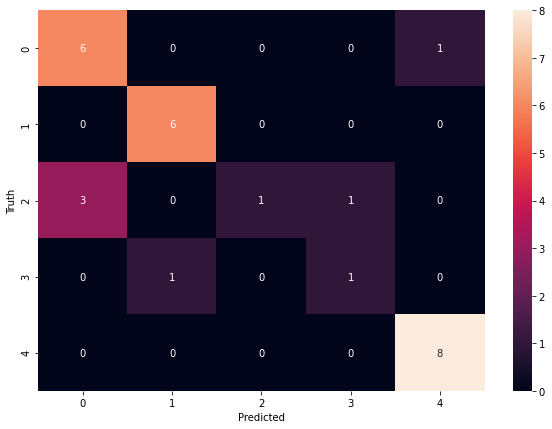

In [43]:
# visualizing cm in a better way
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')


['saved_model.pkl']

In [44]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))